<function matplotlib.pyplot.show(close=None, block=None)>

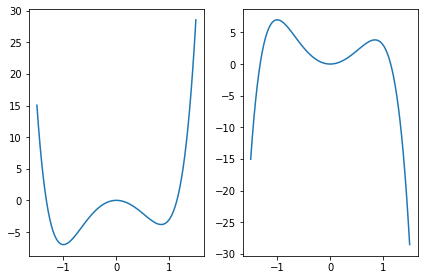

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


#test fucntion for an asymmmetric double well potential
def V(x):
    a = -10
    b = 2
    c = 2
    d = 3
    
    V =  a*x**2 + b*x**3 + c*x**4 + d*x**6
    return V


x = np.linspace(-1.5, 1.5, 100)

plt.subplot(1,2,1)
plt.plot(x, V(x))

plt.subplot(1,2,2)
plt.plot(x, -V(x))

plt.tight_layout()
plt.show



0.6671669884672341


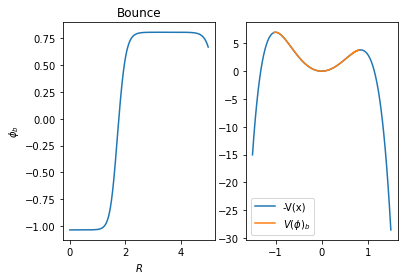

In [3]:
##### Now for the solution of the bounce action

def f(t,y):
    a = -10; b = 3; c = 2; d = 3

    A = y[0]
    B = y[1]

    dA_dt = B
    dB_dt = 2*a*A + 3*b*A**2 + 4*c*A**3 + 6*d*A**5  - (2/t)*B

    return np.array([dA_dt, dB_dt])


t_span = np.array([0.001,5]); times = np.linspace(t_span[0], t_span[1], 10000)

#Chosing some initial value for t and having zero velocity at t = 0

y0 = np.array([-1.036019774615, 0])

soln = solve_ivp(f, t_span, y0, t_eval = times)

t = soln.t; phi = soln.y[0]

plt.subplot(1,2,1)
plt.plot(t,phi)
plt.title('Bounce')
plt.ylabel('$\phi_b$')
plt.xlabel('$R$')

plt.subplot(1,2,2)
plt.plot(x, -V(x), label= '-V(x)')
plt.plot(phi, -V(phi), label='$V(\phi)_b$')
plt.legend(loc = 'lower left')

plt.tight_layout
plt.show

print(phi[-1])

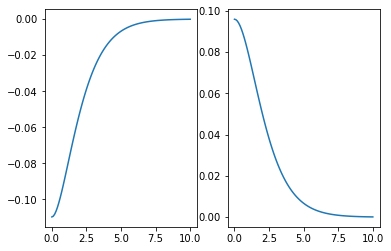

In [4]:
import scipy.integrate as integrate 

#Defining the (exact) Bosonic and fermionic thermal functions to be used it the effective potential

def Jb(m,T):
    
    def integrand(k,m,T):    
        return k**2*np.log(1 - np.exp(-np.sqrt(k**2 + (m/T)**2)))
        
    return (T**4)/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]   

def Jf(m,T):
    
    def integrand(k,m,T):    
        return k**2*np.log(1 + np.exp(-np.sqrt(k**2 + (m/T)**2)))
        
    return (T**4)/(2*np.pi**2)*integrate.quad(integrand, 0, np.inf, args = (m,T))[0]


#Vecotrizing the thermal functions
vec_Jb = np.vectorize(Jb); vec_Jf = np.vectorize(Jf)

m = np.linspace(0, 10,100)
T = 1

plt.subplot(1,2,1)
plt.plot(m, vec_Jb(m,T))

plt.subplot(1,2,2)
plt.plot(m, vec_Jf(m,T))

175.57726000860086


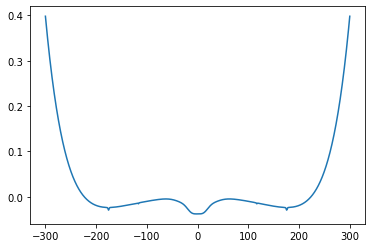

In [76]:
import math


#The 1-loop effective potential  (so far w/o daisy diagram resumation)

#constants of higgs tree level potential
mu = 88
lam = 0.02
c6 = -1/100000


#yukawa coupling constant of fermion f 
y_f = 0.99                                          #(for the top quark)

#EW - sector coupling constants g (SU(2)_L) and g_p (U(1)_Y) 
g = 0.65
g_p = 0.36
eps = 0.00001

# Begin with defining the effective masses (squared) for the relevant particles

# Effective mass of fermion f acquired through yukawa coupling w/ the Higgs
def m_f(phi):
    return (y_f**2/2)*phi**2 + eps

# W and Z boson masses
def m_W(phi):
    return ((g**2)/4)*phi**2 + eps

def m_Z(phi):
    return ((g**2 + g_p**2)/4)*phi**2 + eps

# Higgs and Goldstone masses
def m_h(phi):
    return 3*lam*phi**2 - mu**2 - (15/4)*c6*phi**4 + eps

def m_g(phi):
    return lam*phi**2 - mu**2 - (3/4)*c6*phi**4 + eps


#Separately defining their squared (squared) masses and get rid of any c6^2 terms.
def m_h2(phi):
    return mu**4 - 6*lam*mu**2*phi**2 + (9*lam**2 + (15/2)*c6*mu**2)*phi**4 - (45/2)*c6*lam*phi**6

def m_g2(phi):
    return mu**4 - 2*lam*mu**2*phi**2  + (lam + (3/2)*c6*mu**2)*phi**4 - (3/2)*lam*c6*phi**6
    



Lam = 90    # regulator/Cutoff(?)

#1-loop effective potential
def V_eff(phi, T):
    return (-((mu**2)/2)*phi**2 + (lam/4)*phi**4 - (c6/8)*phi**6
            + m_h(phi)**2/(64*np.pi**2)*(np.log(np.abs(m_h(phi))/Lam) - 3/2) + Jb(m_h(phi),T)
            + 3*m_g(phi)**2/(64*np.pi**2)*(np.log(np.abs(m_g(phi))/Lam) - 3/2) + 3*Jb(m_g(phi),T)
            + 3*m_Z(phi)**2/(64*np.pi**2)*(np.log(m_Z(phi)/Lam) - 5/6) + 3*Jb(m_Z(phi),T)
            + 6*m_W(phi)**2/(64*np.pi**2)*(np.log(m_W(phi)/Lam) - 5/6) + 6*Jb(m_W(phi),T)    
            - 12*m_f(phi)**2/(64*np.pi**2)*(np.log(m_f(phi)/Lam) - 3/2) - 12*Jf(m_f(phi),T)
           )/(246**4)

V_eff = np.vectorize(V_eff)
phi = np.linspace(-300,300,10000)
T = 90

plt.plot(phi, V_eff(phi, T))


#Tree level min
phi_min = ((2*lam)/(3*c6))*(1 - np.sqrt(1 - (3*c6*mu**2)/(lam**2)))

print(np.sqrt(phi_min))
